<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Dondurulmu%C5%9F_G%C4%B1dalar%C4%B1n_Fiyat__Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Sahte Veri Seti Oluşturma:
Bu kodu Colab'da çalıştır ve CSV olarak kaydedelim:

In [ ]:
import pandas as pd
import numpy as np

# Rastgele veri oluşturmak için seed sabitleme
np.random.seed(42)

# Örnek sayısı
num_samples = 1000

# Sahte veri oluşturma
data = pd.DataFrame({
    'temperature': np.random.uniform(-10, 30, num_samples),  # Sıcaklık (Celsius)
    'demand': np.random.randint(50, 500, num_samples),  # Talep miktarı (adet)
    'storage_days': np.random.randint(1, 365, num_samples),  # Depolama süresi (gün)
    'previous_price': np.random.uniform(5, 20, num_samples),  # Önceki fiyat (TL/USD)
})

# Fiyat hesaplama (basit formül)
data['price'] = (
    data['previous_price'] * 1.02 +  # Önceki fiyata %2 artış ekleme
    (data['temperature'] * 0.05) -   # Sıcaklığın etkisi
    (data['demand'] * 0.005) +       # Talebin etkisi
    np.random.normal(0, 1, num_samples)  # Gürültü ekleme (rastgelelik)
)

# CSV olarak kaydetme
data.to_csv('frozen_food_prices.csv', index=False)

print("Veri seti oluşturuldu ve CSV olarak kaydedildi!")


Veri seti oluşturuldu ve CSV olarak kaydedildi!


Öncelikle CSV dosyasını yükleyip veriyi inceleyelim. Colab'da aşağıdaki kodları çalıştır

   temperature  demand  storage_days  previous_price      price
0     4.981605     352           119       13.863012  13.201230
1    28.028572      61           149       13.055112  13.663860
2    19.279758     367           150       17.812040  17.451877
3    13.946339     129           293        5.742453   7.089664
4    -3.759254     265           143       17.499756  16.300193
       temperature       demand  storage_days  previous_price        price
count  1000.000000  1000.000000   1000.000000     1000.000000  1000.000000
mean      9.610262   277.458000    179.889000       12.698083    12.051418
std      11.685494   132.017244    102.739652        4.292303     4.575031
min      -9.814719    50.000000      1.000000        5.006642     1.837505
25%      -0.561069   165.750000     94.500000        9.035101     8.342306
50%       9.872295   279.000000    174.000000       12.918825    12.081257
75%      19.772784   393.000000    266.000000       16.430111    15.858231
max      29.9887

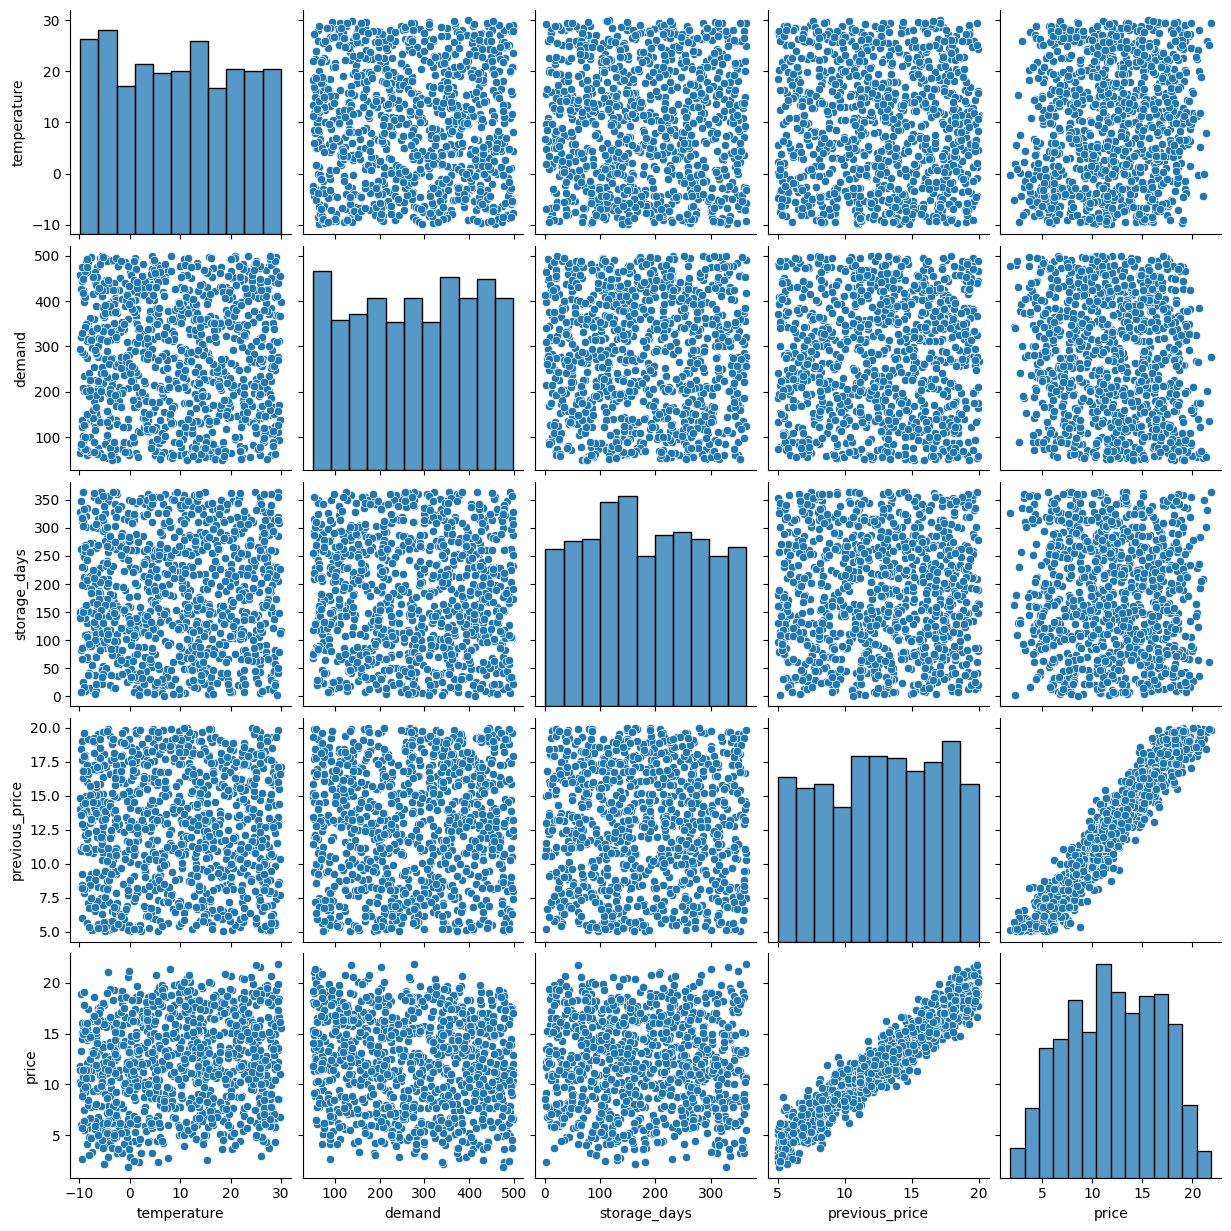

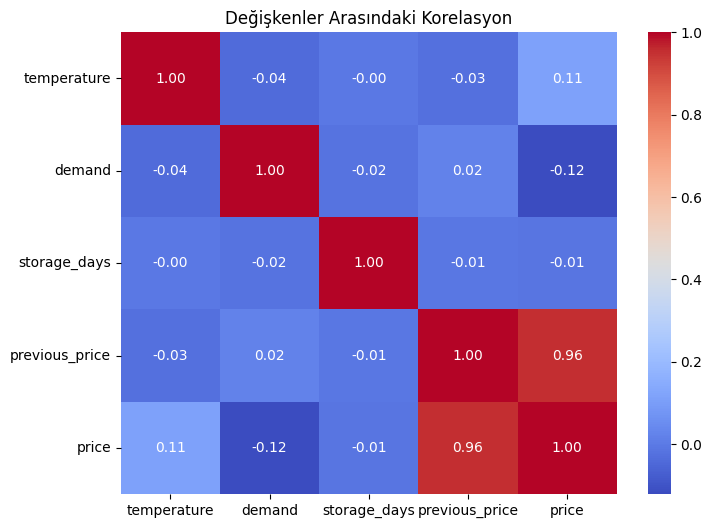

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını yükle
data = pd.read_csv('frozen_food_prices.csv')

# İlk birkaç satırı göster
print(data.head())

# Verinin istatistiklerini incele
print(data.describe())

# Değişkenler arasındaki ilişkiyi görselleştirme
sns.pairplot(data)
plt.show()

# Korelasyon matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon")
plt.show()


🔹 Ne Yapıyoruz?
✅ Veriyi yüklüyoruz
✅ İlk 5 satırı inceliyoruz
✅ İstatistiksel özet çıkartıyoruz
✅ Grafiklerle değişkenler arasındaki ilişkileri analiz ediyoruz

 Makine Öğrenmesi Modeli - Fiyat Tahmini
Şimdi fiyat tahmini yapmak için bir model oluşturalım!

Giriş Değişkenleri (X): sıcaklık, talep, depolama süresi, önceki fiyat
Çıkış Değişkeni (Y): yeni fiyat


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Giriş ve çıkış değişkenlerini ayırma
X = data[['temperature', 'demand', 'storage_days', 'previous_price']]
y = data['price']

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer regresyon modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Modelin tahmin yapması
y_pred = model.predict(X_test_scaled)

# Performans değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")
print(f"RMSE (Karekök Ortalama Hata): {rmse:.2f}")


MAE (Ortalama Mutlak Hata): 0.87
MSE (Ortalama Kare Hata): 1.06
RMSE (Karekök Ortalama Hata): 1.03


Hata Oranı Kaç Olmalı?
Modelin başarısını değerlendirmek için kullanılan MAE (Mean Absolute Error), MSE (Mean Squared Error) ve RMSE (Root Mean Squared Error) metriklerinin belirli bir aralığı yoktur. Ancak, genel olarak şu şekilde yorumlanır:

MAE (Ortalama Mutlak Hata)

İdeal Aralık: 0 - 2 TL/USD (Fiyat tahmini için iyi)
Orta Seviye: 2 - 5 TL/USD (Geliştirilebilir)
Zayıf: 5 TL/USD ve üzeri (Model iyileştirilmeli)
MSE (Ortalama Kare Hata)

Bu değer genellikle büyük olur, çünkü kare alma işlemi küçük farkları büyütür. Ancak mümkün olduğunca küçük olmalı.
RMSE (Karekök Ortalama Hata)

İdeal Aralık: 0 - 3 TL/USD
Orta Seviye: 3 - 6 TL/USD
Zayıf: 6 TL/USD ve üzeri
Özet:
✅ MAE ve RMSE ne kadar düşükse model o kadar iyi çalışıyor demektir.
✅ Eğer hata yüksekse, modeli iyileştirmemiz gerekir.



Modeli Geliştirmek İçin Ne Yapabiliriz?
Hata yüksekse şu adımları deneyebiliriz:

🔹 Daha Fazla Veri: Veri seti küçükse, model yeterince iyi öğrenemez. Daha fazla veri ekleyebiliriz.
🔹 Özellik Mühendisliği: Yeni değişkenler (örneğin, mevsimsel etkiler veya promosyonlar) ekleyebiliriz.
🔹 Farklı Algoritmalar: Linear Regression yerine Random Forest, XGBoost, LightGBM gibi daha güçlü modeller kullanabiliriz.
🔹 Veri Ön İşleme: Özellikle ölçeklendirme, eksik veri doldurma, uç değerleri temizleme gibi işlemler hatayı düşürebilir.

Modeli İyileştirelim!
Şimdi Random Forest Regression ile modelimizi geliştirelim. 📊

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Yeni model oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Modelin tahmin yapması
y_pred_rf = rf_model.predict(X_test)

# Yeni modelin hata metrikleri
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f"✅ Random Forest MAE: {mae_rf:.2f}")
print(f"✅ Random Forest MSE: {mse_rf:.2f}")
print(f"✅ Random Forest RMSE: {rmse_rf:.2f}")


✅ Random Forest MAE: 0.94
✅ Random Forest MSE: 1.33
✅ Random Forest RMSE: 1.15


Hata Karşılaştırması
Eğer önceki modelin (Linear Regression) MAE, MSE, RMSE değerlerini kaydettiysen, onları şu şekilde kıyaslayalım:

In [ ]:
# Hata oranlarını kıyasla
print("🔹 Linear Regression MAE:", round(mae, 2))
print("🔹 Random Forest MAE:", round(mae_rf, 2))

print("🔹 Linear Regression RMSE:", round(rmse, 2))
print("🔹 Random Forest RMSE:", round(rmse_rf, 2))

# En iyi modeli seçme
best_model = "Random Forest" if mae_rf < mae else "Linear Regression"
print(f"🏆 En iyi model: {best_model}")


🔹 Linear Regression MAE: 0.87
🔹 Random Forest MAE: 0.94
🔹 Linear Regression RMSE: 1.03
🔹 Random Forest RMSE: 1.15
🏆 En iyi model: Linear Regression


Hangisini Seçelim?
Eğer Random Forest'ın MAE ve RMSE değerleri daha düşükse, bu modeli kullanarak tahminler yapacağız.
Eğer Linear Regression daha iyi performans gösteriyorsa, onu kullanacağız.




Yeni bir donmuş gıda ürünü için fiyat tahmini yapacağız.
Girdi olarak sıcaklık, talep, depolama süresi ve önceki fiyat verilecek.
Modelimiz bu bilgilere dayanarak yeni fiyatı tahmin edecek.

In [ ]:
# Kullanıcıdan yeni veri girişi
temperature = float(input("Sıcaklık (°C): "))
demand = float(input("Talep (adet): "))
storage_days = float(input("Depolama Süresi (gün): "))
previous_price = float(input("Önceki Fiyat (TL/USD): "))

# Yeni veri seti oluşturma
new_data = [[temperature, demand, storage_days, previous_price]]

# Veriyi ölçeklendirme (çünkü model eğitirken ölçeklendirme yapmıştık)
new_data_scaled = scaler.transform(new_data)

# Model ile tahmin yapma
predicted_price = model.predict(new_data_scaled)

print(f"📌 Tahmini Fiyat: {predicted_price[0]:.2f} TL/USD")


Sıcaklık (°C): 15
Talep (adet): 5
Depolama Süresi (gün): 5
Önceki Fiyat (TL/USD): 5
📌 Tahmini Fiyat: 5.65 TL/USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 Gerçek verilerle test edelim!

Mevcut veri setinden bazı örnekleri alıp, modelin doğru tahmin yapıp yapmadığını inceleyelim

In [ ]:
import numpy as np

# Rastgele bir test verisi seçelim
random_index = np.random.randint(0, len(X_test))
sample_input = X_test.iloc[random_index].values.reshape(1, -1)
sample_real_price = y_test.iloc[random_index]

# Modelin tahmini
sample_predicted_price = model.predict(scaler.transform(sample_input))

print(f"Gerçek Fiyat: {sample_real_price:.2f} TL/USD")
print(f"Modelin Tahmini Fiyatı: {sample_predicted_price[0]:.2f} TL/USD")


Gerçek Fiyat: 8.74 TL/USD
Modelin Tahmini Fiyatı: 8.63 TL/USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
